In [51]:
import pandas as pd
import matplotlib.pyplot as plt
species=pd.read_csv('species_info.csv')
species.head(20)
species_clean=species.drop_duplicates(subset='scientific_name')
species_clean

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [24]:
observation=pd.read_csv('observations.csv')
observation.head()




,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [40]:
merged=pd.merge(right=species_clean,left=observation,on='scientific_name')
merged.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [85]:
plot_1_df = species_clean[['conservation_status', 'category']]
pivot_df = plot_1_df.pivot_table(index='conservation_status', columns='category', aggfunc='size', fill_value=0)
pivot_df


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,3,2,0,0,2


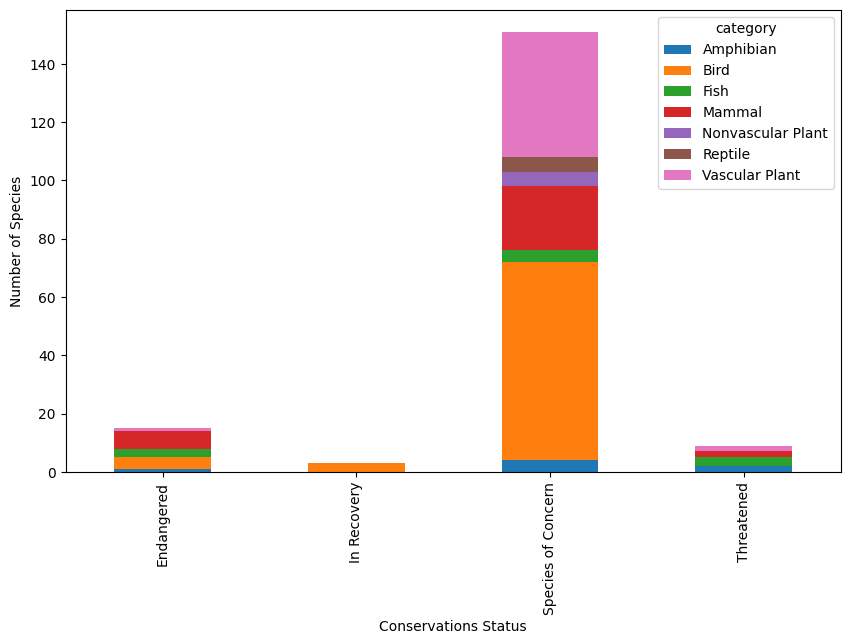

In [93]:
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Conservations Status')
plt.ylabel('Number of Species')
plt.savefig('Bar.png')


In [144]:

pivot_df = merged.pivot_table(index='park_name', columns='category', values='observations',aggfunc='sum')
pivot_df


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7380,51647,12423,20550,32992,7950,443083
Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333619
Yellowstone National Park,19440,127251,30574,50795,83021,19554,1112927
Yosemite National Park,11444,76207,18615,30339,49783,11483,665461


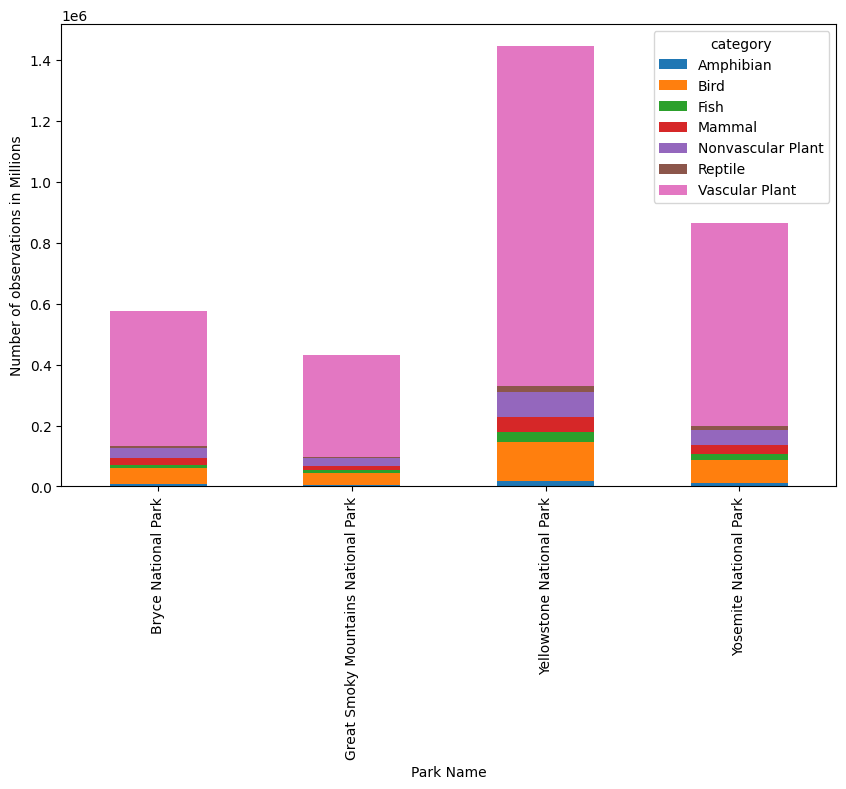

In [152]:
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Park Name')
plt.ylabel('Number of observations in Millions')
plt.savefig('Bar2.png')